# Twitter Messages Data Analysis
Code link: https://github.com/hennypurwadi/twitter_analysis

### Collect Tweets from particular geocode location in Google map
https://tinyurl.com/nh26dkkn

# 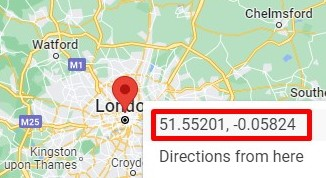

In [ ]:
!pip3 install snscrape
!pip install tweepy
!pip install wordcloud

In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import string
import snscrape.modules.twitter as sntwitter
import tweepy
import unicodedata
import random
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

### Collect Tweets Without Twitter Developer Account /API: with snscrape

In [3]:
#Create and append to csv file and then write tweets into csv file
tweet_data = open('London_tweets_sns.csv', 'a', newline='', encoding='utf8')
csv.writer(tweet_data).writerow(['username','tweet','hashtags']) 

#Radius around 30 km around particular geocode
max_tweets = 100
for n,tweet in enumerate(sntwitter.TwitterSearchScraper('geocode:51.55201,-0.05824,100km \
        + since:2022-07-15 until:2022-07-16 lang:en -filter:links -filter:replies').get_items()):
    
    if n > max_tweets:
        break
    csv.writer(tweet_data).writerow([tweet.user.username, tweet.content, tweet.hashtags])      
tweet_data.close()

In [4]:
df_sns = pd.read_csv('London_tweets_sns.csv')
df_sns = df_sns.dropna(subset = ['hashtags']) #Only use tweets which contained hashtags
df_sns.head()

,username,tweet,hashtags
24,srndptyfinder,Hi everyone! I am a month baby Engene! I start...,"['ENHYPEN', 'ENGENE']"
25,Thefrogkilller,Do you know 💡 Wizkid is #10 Most Awarded Male ...,['WizkidAt32']
31,mndlluna,Tasha needs to go home I can’t stand her anymo...,['LoveIsland']
38,DRUMSradio,"#NP Dvine Brothers, Afrique Essence - Soulful ...","['NP', 'Afrohouse', 'Amapiano', 'DrumsRadio']"
44,MrStevenCree,Absolutely loved the last ep of Strange New Wo...,['StrangeNewWorlds']


### Collect Tweets With Twitter Developer Account API: with tweepy

### Twitter Developer API
We can apply for "Elevated" for free, from default "Essential" developer.

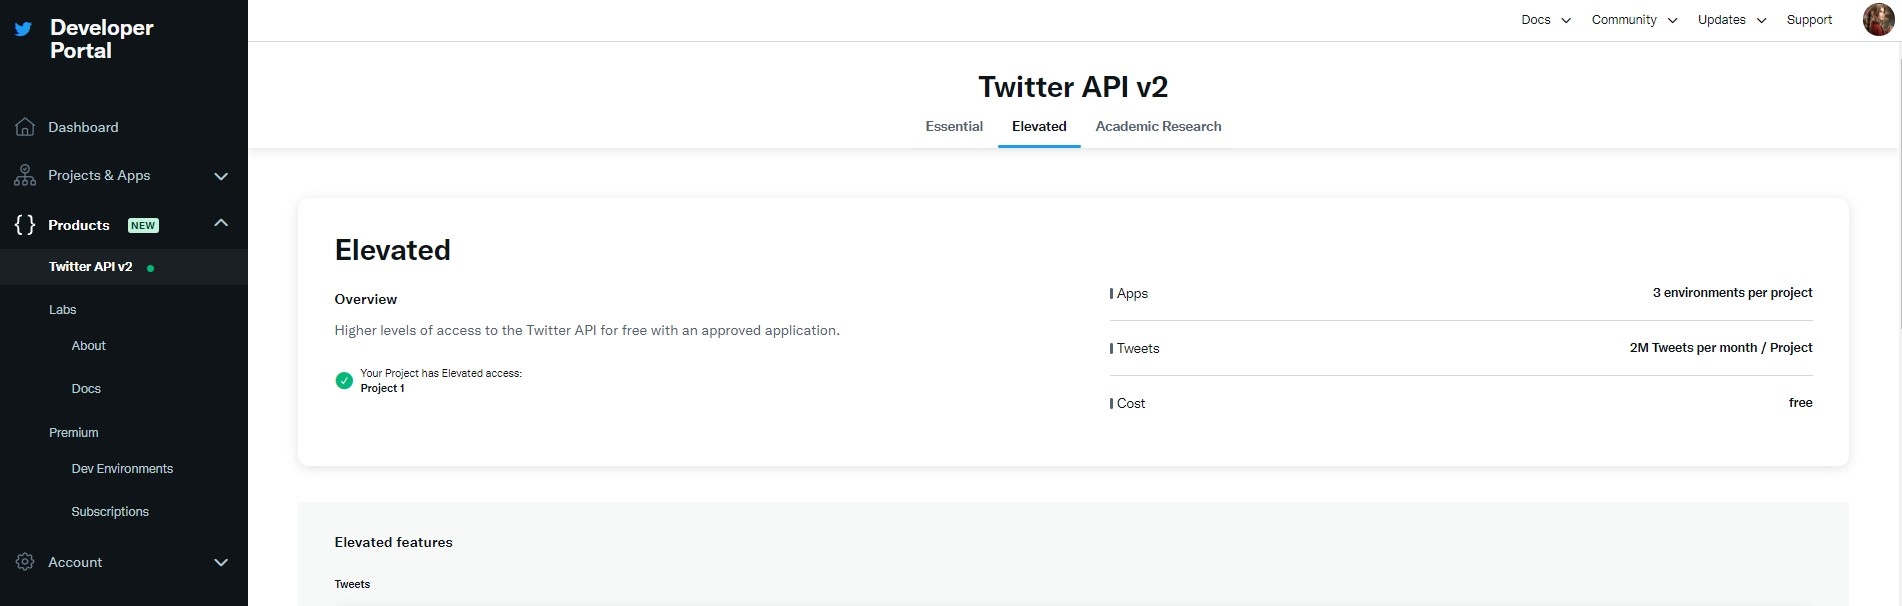

In [5]:
#https://developer.twitter.com/en/portal/dashboard

API_KEY = 'JYW7WsKbVLqOnhJZd4Kqfwtfk'
API_SECRET = 'sPAUmw4DQhnb4aGmZD1B8On7Z8SJzegycAfQEM9wGL3GFwx4ni'
ACCESS_TOKEN = '900524114976296960-vBIQ0CoAWvP4kfSctnB3ejV5bJpNMqw'
ACCESS_TOKEN_SECRET = 'egd1tOSY0LYKB1fxjPTBCvPPtYMIhJmlAI6HZ7Z09Zv7j'

a = tweepy.OAuthHandler(API_KEY, API_SECRET)
a.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
API = tweepy.API(a)

In [6]:
csvFile = open("london_tweets_tweepy.csv", "a+",newline="", encoding = "utf-8")
csvWriter = csv.writer(csvFile)
l = [] #location
u = [] #username
t = [] #tweet text
h = [] #hashtags

max_tweets = 100
n = 0  
for tweet in (API.search_tweets('geocode:51.55201,-0.05824,100km', lang='en', count=100, \
                    since_id="2022-07-15", until='2022-07-16')):
    #print(tweet.created_at, tweet.id, tweet.user.name,tweet.text)
    l.append(tweet.user.location)
    u.append(tweet.user.name)
    t.append(tweet.text.encode("utf-8"))
    h.append(tweet.entities['hashtags'])    
    n += 1  
    
    if n > max_tweets:
        break
          
    tweets=[tweet.created_at, tweet.id,tweet.user.location,tweet.user.name,
            tweet.text.encode("utf-8"),tweet.entities['hashtags']]
    csvWriter.writerow(tweets)

dictTweets = {"location":l,"username":u,"tweet":t, "hashtags": h}

csvFile.close()

In [7]:
df = pd.read_csv('London_tweets_tweepy.csv')
df = pd.DataFrame(dictTweets, columns=["location","username","tweet","hashtags"])
df.head(20)

,location,username,tweet,hashtags
0,"England, United Kingdom",Ashley,b'I won 7 achievements in PowerWash Simulator ...,"[{'text': 'TrueAchievements', 'indices': [62, ..."
1,London/Brighton,Johnathan Dickinson,b'@SW_Help Hi will you ensure that air conditi...,[]
2,"London, England",Gb_Casanova,"b""@og_tigress If I die, I will die the way it ...",[]
3,"Bristol, England",adam,b'@travvprivv @WentyV03 @DeclanMcKenna @fontai...,[]
4,"London, England",C£,"b'Gorr is unhingeddd, Wanda just needs that cy...",[]
5,"London, England",Omar Baggili 💙,"b""@suzyquiquero @Keir_Starmer @UKLabour No I'd...",[]
6,"South East, England, UK",AceMcCloud,b'I won 3 achievements in Sonic Origins for 29...,"[{'text': 'TrueAchievements', 'indices': [56, ..."
7,Wokingham Berkshire UK,Wokingham Weather,b'Temp: 16.6\xef\xbf\xbdC. Humidity 67% Rain t...,[]
8,London Borough of Cheznar🇮🇱,Yikyak🇮🇱,b'Northern lad....loves Spurs...#properyid \xf...,"[{'text': 'properyid', 'indices': [30, 40]}]"
9,Teddington,@revmaryhawes (she/her),b'Wordle 392 3/6\n\n\xf0\x9f\x9f\xa9\xe2\xac\x...,[]


In [8]:
len(df)

100

### Remove emojis from username
Can't clean username like make Capital letter become lowercase etc, since Capital letter etc is unique part of the name.

Only remove emojis from username.

In [9]:
emoji_pattern = re.compile("["
                        "\U0001F600-\U0001F64F"  # emoticons
                        "\U0001F1E0-\U0001F1FF"  # flags (iOS)
                        "\U0001F300-\U0001F5FF"  # pictographs, symbols 
                        "\U0001F700-\U0001F77F"  # alchemical symbols
                        "\U0001F680-\U0001F6FF"  # transport & map symbols
                        "\U0001FA00-\U0001FA6F"  # Chess Symbols
                        "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                        "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                        "\U00002702-\U000027B0"  # Dingbats
                        "\U0001F1E0-\U0001F1FF"  # flags (iOS)   
                        "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                        "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs                        
                        "\U000024C2-\U0001F251" 
                        "]+", flags=re.UNICODE)  

def delete_emoji(string):
    return emoji_pattern.sub(r'', string)

df['username_no_emoji'] = df['username'].apply(delete_emoji)
df[['username','username_no_emoji']].head(17)

,username,username_no_emoji
0,Ashley,Ashley
1,Johnathan Dickinson,Johnathan Dickinson
2,Gb_Casanova,Gb_Casanova
3,adam,adam
4,C£,C£
5,Omar Baggili 💙,Omar Baggili
6,AceMcCloud,AceMcCloud
7,Wokingham Weather,Wokingham Weather
8,Yikyak🇮🇱,Yikyak
9,@revmaryhawes (she/her),@revmaryhawes (she/her)


## 1. Entity analysis to find 5 most active users.

In [10]:
#df['user'].unique()
userlist = df['username_no_emoji'].value_counts()
most_active_users = userlist.head(5)
most_active_users

ᴱᶫᵃᶦᶰᵉ ᶜᵃᵈˢ         3
Karel.              2
Alia - Ish who??    2
Ashley              1
George Brown        1
Name: username_no_emoji, dtype: int64

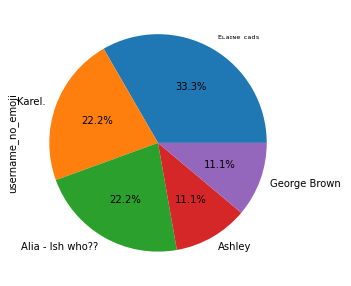

In [11]:
plot_users=most_active_users.plot.pie(autopct='%1.1f%%', figsize=(5, 5))
plt.rc('axes', unicode_minus=False)
plt.savefig("MostActiveUser_chart.jpeg",transparent=False, bbox_inches='tight',pad_inches=0.1)

## 2. Entity analysis to find 5 most used hastags

### Lite Cleaning for hashtags
Cleaning hashtags to get 5 most prevalent ones is lite cleaning

In [12]:
#Functun to convert to str
def lightclean(hashtags_data):  
    hashtags_data = str(hashtags_data).lower() #make str
    return hashtags_data

df['Cleaned_Hashtags'] = df['hashtags'].apply(lightclean)

htag_Texts_Cleaned=df['Cleaned_Hashtags'].values
htag_Texts_Cleaned=str(htag_Texts_Cleaned)
htag_Texts_Cleaned = re.sub(r'[^a-z A-Z]', ' ',htag_Texts_Cleaned)
htag_Texts_Cleaned= re.sub(r' +', ' ', htag_Texts_Cleaned)
htag_Texts_Cleaned= re.sub(r' text', ' ', htag_Texts_Cleaned) #remove 'text'
print("Cleaned hashtags:" + "\n" + htag_Texts_Cleaned)

Cleaned hashtags:
  trueachievements indices  trueachievements indices  properyid indices  dailypick indices  travelbytrain indices  robloxdev indices  roblox indices  corrie indices 


### Counting the number of hastags

In [13]:
def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
    return counts

hashtag_count = word_count(htag_Texts_Cleaned)
print(hashtag_count)

{'trueachievements': 2, 'indices': 8, 'properyid': 1, 'dailypick': 1, 'travelbytrain': 1, 'robloxdev': 1, 'roblox': 1, 'corrie': 1}


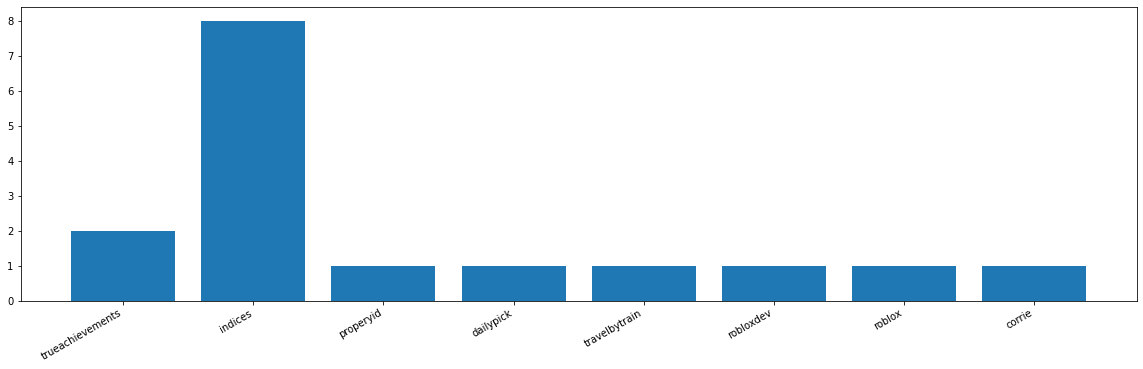

In [14]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(20, 6))
ax1.bar(hashtag_count.keys(), hashtag_count.values())
fig.autofmt_xdate()
plt.savefig('hashtag_count_graph.jpeg')
plt.show()

In [15]:
MostPopularHashtags = sorted(hashtag_count, key=hashtag_count.get, reverse=True)[:5]
#' '.join(MostPopularHashtags)
MostPopularHashtags

['indices', 'trueachievements', 'properyid', 'dailypick', 'travelbytrain']

In [16]:
#Convert list to str

MostPopularHashtags_str = ''
i = 0
for x in MostPopularHashtags:
    i = i+1
    if i < 5:
        MostPopularHashtags_str += '#'+ x + ', '
    else:
        MostPopularHashtags_str += '#'+ x
    
print("5 Most popular hastags are : " + MostPopularHashtags_str)

5 Most popular hastags are : #indices, #trueachievements, #properyid, #dailypick, #travelbytrain


In [17]:
TopPopularHashtags = sorted(hashtag_count, key=hashtag_count.get, reverse=True)[:1]
TopPopularHashtags_str = ' '.join(str(e) for e in TopPopularHashtags) #convert list to str
TopPopularHashtags_str
print("Top popular hastags is : " + TopPopularHashtags_str)

Top popular hastags is : indices


## 3. Entity analysis to extract five most prevalent topics in the tweets

### Preprocessing, Cleaning with regex
Make the text lowercase, remove line breaks, punctuation, usernames, url, extra spaces, etc

In [53]:
def cleaning(tweets_data):   
    tweets_data = str(tweets_data).lower() #Make the text lowercase.
    tweets_data = re.sub(r'#[A-Za-z0–9]+', '', tweets_data) #remove hashtags
    tweets_data=re.sub(r'@[A-Za-z0–9]+', '',tweets_data) #remove usernames    
    tweets_data=re.sub(r'@\w+', ' ', tweets_data) #remove usernames
    tweets_data= re.sub(r'\b\w{1}\b', '', tweets_data) #remove stopwords   
    tweets_data = re.sub(r'&(?![A-Za-z]+[0-9]*;|#[0-9]+;|#x[0-9a-fA-F]+;)', '', tweets_data)
    tweets_data = re.sub(r'&amp', '', tweets_data) 
    tweets_data = re.sub('\n', '', tweets_data) #Remove line breaks.
    tweets_data = re.sub('[%s]' % re.escape(string.punctuation), '', tweets_data) #remove punctuation
    tweets_data = re.sub('\[.*?\]', '', tweets_data)
    tweets_data=re.sub(r'http\S+', ' ', tweets_data) #remove all Url
    tweets_data = re.sub(r'https?:\/\/.*[\r\n]*', '', tweets_data) #remove website
    tweets_data = re.sub('https?://\S+|www\.\S+', '', tweets_data)  #remove all websites 
    tweets_data = re.sub(r' +', ' ', tweets_data) #remove extra space
    tweets_data = re.sub('<.*?>+', '', tweets_data)    
    tweets_data = re.sub('\w*\d\w*', '', tweets_data)
    tweets_data = re.sub(r'^RT[\s]+', '', tweets_data)    
    tweets_data = re.sub(r'[^a-z A-Z]', ' ',tweets_data) #Remove all not characters
    tweets_data = re.sub(emoji_pattern, '', tweets_data)#remove emojis
          
    return tweets_data

df['clean1_tweet'] = df['tweet'].apply(cleaning)
df_cleaned_tweets=df[['tweet','clean1_tweet']]
df_cleaned_tweets.head(10)

,tweet,clean1_tweet
0,b'I won 7 achievements in PowerWash Simulator ...,won achievements in powerwash simulator for ...
1,b'@SW_Help Hi will you ensure that air conditi...,help hi will you ensure that air conditioning ...
2,"b""@og_tigress If I die, I will die the way it ...",tigress if die will die the way it is intended...
3,b'@travvprivv @WentyV03 @DeclanMcKenna @fontai...,literally am coming to leeds in september
4,"b'Gorr is unhingeddd, Wanda just needs that cy...",gorr is unhingeddd wanda just needs that cybor...
5,"b""@suzyquiquero @Keir_Starmer @UKLabour No I'd...",starmer no understand it if he wasnt the labo...
6,b'I won 3 achievements in Sonic Origins for 29...,won achievements in sonic origins for points...
7,b'Temp: 16.6\xef\xbf\xbdC. Humidity 67% Rain t...,temp humidity rain today mm barometer hpa r...
8,b'Northern lad....loves Spurs...#properyid \xf...,northern ladloves spurs
9,b'Wordle 392 3/6\n\n\xf0\x9f\x9f\xa9\xe2\xac\x...,wordle


### Remove stopwords with nltk

In [54]:
stopwords = nltk.corpus.stopwords.words('english') 
df['clean2_tweet'] = df['clean1_tweet'].apply(
    lambda x: " ".join(x for x in x.split() if x not in stopwords))

df_cleaned_tweets=df[['tweet','clean2_tweet']]
df_cleaned_tweets.head()

,tweet,clean2_tweet
0,b'I won 7 achievements in PowerWash Simulator ...,achievements powerwash simulator points
1,b'@SW_Help Hi will you ensure that air conditi...,help hi ensure air conditioning working operat...
2,"b""@og_tigress If I die, I will die the way it ...",tigress die die way intended never fake death ...
3,b'@travvprivv @WentyV03 @DeclanMcKenna @fontai...,literally coming leeds september
4,"b'Gorr is unhingeddd, Wanda just needs that cy...",gorr unhingeddd wanda needs cyborg green gobli...


### Stemming with nltk

In [55]:
stm = PorterStemmer()
df['clean3_tweet'] = df['clean2_tweet'].apply(
    lambda x: " ".join([stm.stem(word) for word in x.split()]))

df_cleaned_tweets=df[['tweet','clean3_tweet']]
df_cleaned_tweets.head()

,tweet,clean3_tweet
0,b'I won 7 achievements in PowerWash Simulator ...,achiev powerwash simul point
1,b'@SW_Help Hi will you ensure that air conditi...,help hi ensur air condit work oper train carri...
2,"b""@og_tigress If I die, I will die the way it ...",tigress die die way intend never fake death li...
3,b'@travvprivv @WentyV03 @DeclanMcKenna @fontai...,liter come leed septemb
4,"b'Gorr is unhingeddd, Wanda just needs that cy...",gorr unhingeddd wanda need cyborg green goblin...


### Lemitization with nltk

In [56]:
##lemmatization to bring the words in their root form  
lem = WordNetLemmatizer()
df['cleaned_tweet'] = df['clean3_tweet'].apply(
    lambda x: " ".join([lem.lemmatize(word) for word in x.split()]))
df_cleaned_tweets=df[['tweet','cleaned_tweet']]
df_cleaned_tweets.head()

,tweet,cleaned_tweet
0,b'I won 7 achievements in PowerWash Simulator ...,achiev powerwash simul point
1,b'@SW_Help Hi will you ensure that air conditi...,help hi ensur air condit work oper train carri...
2,"b""@og_tigress If I die, I will die the way it ...",tigress die die way intend never fake death li...
3,b'@travvprivv @WentyV03 @DeclanMcKenna @fontai...,liter come leed septemb
4,"b'Gorr is unhingeddd, Wanda just needs that cy...",gorr unhingeddd wanda need cyborg green goblin...


### Comparison before cleaning vs after cleaned

In [57]:
df['tweet'].loc[0] #Before cleaning

b'I won 7 achievements in PowerWash Simulator for 809 points on #TrueAchievements https://t.co/fbum91VDty'

In [58]:
df['cleaned_tweet'].loc[0] #After cleaned

'achiev powerwash simul point'

### Vectorize cleaned tweets with CountVectorizer
     

In [59]:
countv = CountVectorizer(min_df=1,max_df=0.9,stop_words='english')
countv_tweet = countv.fit_transform(df['cleaned_tweet'])
countv_tweet

<100x372 sparse matrix of type '<class 'numpy.int64'>'
	with 431 stored elements in Compressed Sparse Row format>

In [60]:
countv_tweet.shape

(100, 372)

### Vectorize cleaned tweets with Tf-IDF

In [61]:
tfidf = TfidfVectorizer(max_df=0.95, min_df=1, stop_words='english')
tfidf_tweet = tfidf.fit_transform(df['cleaned_tweet'])
tfidf_tweet

<100x372 sparse matrix of type '<class 'numpy.float64'>'
	with 431 stored elements in Compressed Sparse Row format>

## Topic extraction with LDA (Latent Dirichlet Allocation) with Countvectorizer

In [62]:
LDA_countv = LatentDirichletAllocation(n_components=5,random_state=42)
LDA_countv.fit(countv_tweet)

LatentDirichletAllocation(n_components=5, random_state=42)

In [63]:
#len(LDA_countv.components_[0])
LDA_countv.components_

array([[1.1999676 , 1.19997822, 0.20000749, ..., 0.20002047, 0.200004  ,
        0.20000532],
       [0.20001835, 0.20000528, 1.199968  , ..., 1.19991395, 0.20000386,
        1.19997784],
       [1.19997362, 0.20000518, 0.20000772, ..., 0.20002047, 0.200004  ,
        0.20000526],
       [0.20002028, 0.20000574, 0.20000828, ..., 0.20002263, 1.19998368,
        0.20000581],
       [0.20002015, 0.20000558, 0.2000085 , ..., 0.20002248, 0.20000447,
        0.20000577]])

In [64]:
eachtopic = LDA_countv.components_[0]
eachtopic.argsort()

array([205,  24, 146, 143, 263, 124, 321, 358, 248, 195, 308, 356, 201,
        66,  40, 277, 134, 293,  47,  20,  48,  83, 181,  97,  31, 354,
       275,  86, 347, 111, 335, 115, 119,  69,  51,  65, 188, 178,  68,
         8, 139, 324,  61,  88, 221, 140,  50, 363, 255, 244, 233, 175,
       141, 283, 157,  35,  33, 190, 227, 327,  23,   7, 370, 309, 223,
       249, 161, 340, 117, 225, 168, 239, 144, 118, 259, 260, 200, 349,
       337, 364,   9,  19, 110, 228,  49, 328, 287, 180,   4,  67,  21,
       300, 150, 165, 298, 357, 137, 147, 163,  77, 317, 156, 154, 315,
       216, 292, 104, 197,  90, 238, 299, 326, 116, 280, 226, 350, 169,
       365, 344,  64, 230, 264, 196, 279, 339,  13,  17, 167, 224, 303,
       289, 336,  52, 241, 297, 332, 371, 105, 194,  98,  80, 126, 246,
       305, 258, 322, 302,  63, 234,  60, 325,  53, 130, 184, 103,  45,
       338, 187, 213, 301,  22, 106, 355, 251, 312, 189, 155, 151, 109,
       210, 367, 114, 133,  28, 127, 214, 266,  73, 202, 182, 33

In [65]:
#eachtopic[183]
# Top 5 words for this topic:
eachtopic.argsort()[-5:]

array([ 79, 185, 252, 212,   3], dtype=int64)

In [66]:
word_top = eachtopic.argsort()[-5:]
for index in word_top:
    print(countv.get_feature_names()[index])

die
macbook
releas
new
air


In [84]:
for index,topic in enumerate(LDA_countv.components_):
    print(f'Most prevalent topic #{index}'+ ': ')
    print([countv.get_feature_names()[i] for i in topic.argsort()[-1:]])

Most prevalent topic #0: 
['air']
Most prevalent topic #1: 
['want']
Most prevalent topic #2: 
['think']
Most prevalent topic #3: 
['time']
Most prevalent topic #4: 
['nice']


In [85]:
topic_lda_cv = LDA_countv.transform(countv_tweet)
topic_lda_cv[0].argmax()
topic_lda_cv.argmax(axis=1)
df['Topic_lda_cv'] = topic_lda_cv.argmax(axis=1)
df[['tweet','cleaned_tweet','Topic_lda_cv']].head(10)

,tweet,cleaned_tweet,Topic_lda_cv
0,b'I won 7 achievements in PowerWash Simulator ...,achiev powerwash simul point,2
1,b'@SW_Help Hi will you ensure that air conditi...,help hi ensur air condit work oper train carri...,2
2,"b""@og_tigress If I die, I will die the way it ...",tigress die die way intend never fake death li...,0
3,b'@travvprivv @WentyV03 @DeclanMcKenna @fontai...,liter come leed septemb,2
4,"b'Gorr is unhingeddd, Wanda just needs that cy...",gorr unhingeddd wanda need cyborg green goblin...,2
5,"b""@suzyquiquero @Keir_Starmer @UKLabour No I'd...",starmer understand wasnt labour leader labour ...,2
6,b'I won 3 achievements in Sonic Origins for 29...,achiev sonic origin point,0
7,b'Temp: 16.6\xef\xbf\xbdC. Humidity 67% Rain t...,temp humid rain today mm baromet hpa rise wind...,2
8,b'Northern lad....loves Spurs...#properyid \xf...,northern ladlov spur,1
9,b'Wordle 392 3/6\n\n\xf0\x9f\x9f\xa9\xe2\xac\x...,wordl,0


In [69]:
df['tweet'].loc[4] #Before cleaning

b'Gorr is unhingeddd, Wanda just needs that cyborg d, green goblin is just scary &amp; wenwu is just dumb https://t.co/aAL1PVCshk'

In [70]:
df['cleaned_tweet'].loc[4] #After cleaning

'gorr unhingeddd wanda need cyborg green goblin scari wenwu dumb'

## Topic extraction with LDA (Latent Dirichlet Allocation) with Tf-IDF

In [71]:
LDA_tfidf = LatentDirichletAllocation(n_components=5,random_state=42)
LDA_tfidf.fit(tfidf_tweet)

LatentDirichletAllocation(n_components=5, random_state=42)

In [72]:
LDA_tfidf.components_

array([[0.68462012, 0.59285836, 0.20002191, ..., 0.20003151, 0.55701161,
        0.20002317],
       [0.20005387, 0.20002316, 0.66195508, ..., 0.90697377, 0.20002075,
        0.55450591],
       [0.6851488 , 0.20002229, 0.20002441, ..., 0.20003405, 0.2000214 ,
        0.20002478],
       [0.20005441, 0.20002266, 0.20002427, ..., 0.2000349 , 0.20002194,
        0.20002541],
       [0.20005073, 0.20002113, 0.20002421, ..., 0.20003255, 0.20002094,
        0.20002369]])

In [73]:
eachtopics = LDA_tfidf.components_[0]
eachtopics.argsort()

array([205,  97, 238,  31, 280, 322,  86, 111, 354, 119, 347, 335,  69,
       275, 115, 248, 263, 356, 308,  24, 195, 124, 146, 358, 321, 201,
       143,  83,  66, 293,  20, 277, 134, 181,  48,  47,  40,  61, 363,
        50,  88, 140, 139, 221, 324, 255, 141, 233, 157, 244, 175, 283,
        35, 357, 200, 260, 225, 144, 118, 168, 117, 239, 259, 137, 163,
       317,  77, 156, 154, 147,  19, 110, 364,   9, 337, 349, 315, 292,
        90, 104, 216, 197, 336,  52, 297, 241, 167, 303, 224,  17, 289,
       344, 365,  64, 230, 213, 338, 103,  45, 187,  51,   8,  68,  65,
       188, 178, 355,  22, 106, 301, 116, 299, 326, 150,  67, 300,   4,
       180,  21, 155, 109, 151,  53, 325, 130, 184,  80, 246, 258, 305,
       126,  73, 182, 202, 127, 214,  28, 266, 210, 133, 114, 367, 191,
       198, 361,  91, 331, 158, 199, 236, 161, 223, 340, 309, 249, 302,
       234,  60,  63,   2, 122, 333, 189, 251, 312, 304,  10, 273, 128,
        12, 192, 121,  78, 278, 170, 371, 332,  98, 105, 194, 32

In [74]:
#eachtopics[183]
# Top 5 words for this topic:
eachtopics.argsort()[-5:]

array([330, 252, 318, 362, 306], dtype=int64)

In [87]:
for index,topic in enumerate(LDA_tfidf.components_):
    print(f'Most prevalent topic #{index}'+ ': ')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-1:]]) 

Most prevalent topic #0: 
['tappet']
Most prevalent topic #1: 
['want']
Most prevalent topic #2: 
['liter']
Most prevalent topic #3: 
['free']
Most prevalent topic #4: 
['morn']


In [88]:
topic_lda_tfidf = LDA_tfidf.transform(tfidf_tweet)
topic_lda_tfidf.shape
topic_lda_tfidf[0].round(2)
topic_lda_tfidf[0].argmax()
topic_lda_tfidf.argmax(axis=1)

array([2, 2, 0, 2, 3, 0, 0, 2, 1, 0, 4, 1, 4, 4, 1, 4, 0, 4, 4, 0, 0, 0,
       0, 0, 3, 3, 4, 4, 1, 3, 4, 4, 4, 4, 0, 2, 1, 3, 4, 3, 2, 2, 4, 0,
       1, 1, 1, 3, 4, 2, 0, 1, 2, 4, 0, 3, 3, 1, 3, 1, 1, 1, 2, 0, 0, 2,
       2, 3, 4, 2, 2, 2, 1, 1, 3, 3, 2, 0, 0, 4, 1, 0, 4, 1, 3, 4, 4, 4,
       3, 0, 4, 1, 0, 1, 4, 3, 0, 0, 2, 3], dtype=int64)

In [77]:
df['Topic_lda_tfif'] = topic_lda_tfidf.argmax(axis=1)
df[['tweet','cleaned_tweet','Topic_lda_tfif']].head(10)

,tweet,cleaned_tweet,Topic_lda_tfif
0,b'I won 7 achievements in PowerWash Simulator ...,achiev powerwash simul point,2
1,b'@SW_Help Hi will you ensure that air conditi...,help hi ensur air condit work oper train carri...,2
2,"b""@og_tigress If I die, I will die the way it ...",tigress die die way intend never fake death li...,0
3,b'@travvprivv @WentyV03 @DeclanMcKenna @fontai...,liter come leed septemb,2
4,"b'Gorr is unhingeddd, Wanda just needs that cy...",gorr unhingeddd wanda need cyborg green goblin...,3
5,"b""@suzyquiquero @Keir_Starmer @UKLabour No I'd...",starmer understand wasnt labour leader labour ...,0
6,b'I won 3 achievements in Sonic Origins for 29...,achiev sonic origin point,0
7,b'Temp: 16.6\xef\xbf\xbdC. Humidity 67% Rain t...,temp humid rain today mm baromet hpa rise wind...,2
8,b'Northern lad....loves Spurs...#properyid \xf...,northern ladlov spur,1
9,b'Wordle 392 3/6\n\n\xf0\x9f\x9f\xa9\xe2\xac\x...,wordl,0


## Topic extraction with NMF (Non-Negative Matric Factorization) with Countvectorizer

In [ ]:
nmf_model_cv = NMF(n_components=5, random_state=42) 
nmf_model_cv.fit(countv_tweet) 

In [79]:
for index,topic in enumerate(nmf_model_cv.components_):
    print(f'Most prevalent topic #{index}'+ ': ')
    print([countv.get_feature_names()[i] for i in topic.argsort()[-1:]]) 

Most prevalent topic #0: 
['air']
Most prevalent topic #1: 
['want']
Most prevalent topic #2: 
['mph']
Most prevalent topic #3: 
['time']
Most prevalent topic #4: 
['die']


In [80]:
topic_nmf_cv = nmf_model_cv.transform(countv_tweet)
topic_nmf_cv.argmax(axis=1)
df['Topic_nmf_cv'] = topic_nmf_cv.argmax(axis=1)
df[['tweet','cleaned_tweet','Topic_nmf_cv']].head(10)

,tweet,cleaned_tweet,Topic_nmf_cv
0,b'I won 7 achievements in PowerWash Simulator ...,achiev powerwash simul point,3
1,b'@SW_Help Hi will you ensure that air conditi...,help hi ensur air condit work oper train carri...,0
2,"b""@og_tigress If I die, I will die the way it ...",tigress die die way intend never fake death li...,4
3,b'@travvprivv @WentyV03 @DeclanMcKenna @fontai...,liter come leed septemb,3
4,"b'Gorr is unhingeddd, Wanda just needs that cy...",gorr unhingeddd wanda need cyborg green goblin...,4
5,"b""@suzyquiquero @Keir_Starmer @UKLabour No I'd...",starmer understand wasnt labour leader labour ...,3
6,b'I won 3 achievements in Sonic Origins for 29...,achiev sonic origin point,3
7,b'Temp: 16.6\xef\xbf\xbdC. Humidity 67% Rain t...,temp humid rain today mm baromet hpa rise wind...,2
8,b'Northern lad....loves Spurs...#properyid \xf...,northern ladlov spur,3
9,b'Wordle 392 3/6\n\n\xf0\x9f\x9f\xa9\xe2\xac\x...,wordl,0


## Topic extraction with NMF (Non-Negative Matric Factorization) with Tf-IDF

In [ ]:
nmf_model_tfidf= NMF(n_components = 5, random_state=42)
nmf_model_tfidf.fit(countv_tweet)

In [82]:
for index,topic in enumerate(nmf_model_tfidf.components_):
    print(f'Most prevalent topic #{index}'+ ': ')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-1:]])        

Most prevalent topic #0: 
['air']
Most prevalent topic #1: 
['want']
Most prevalent topic #2: 
['mph']
Most prevalent topic #3: 
['time']
Most prevalent topic #4: 
['die']


In [83]:
topic_nmf_tfidf = nmf_model_tfidf.transform(tfidf_tweet)
topic_nmf_tfidf.argmax(axis=1)
df['Topics_nmf_tfidf'] = topic_nmf_tfidf.argmax(axis=1)
df[['tweet','cleaned_tweet','Topics_nmf_tfidf']].head(10)

,tweet,cleaned_tweet,Topics_nmf_tfidf
0,b'I won 7 achievements in PowerWash Simulator ...,achiev powerwash simul point,3
1,b'@SW_Help Hi will you ensure that air conditi...,help hi ensur air condit work oper train carri...,0
2,"b""@og_tigress If I die, I will die the way it ...",tigress die die way intend never fake death li...,4
3,b'@travvprivv @WentyV03 @DeclanMcKenna @fontai...,liter come leed septemb,3
4,"b'Gorr is unhingeddd, Wanda just needs that cy...",gorr unhingeddd wanda need cyborg green goblin...,4
5,"b""@suzyquiquero @Keir_Starmer @UKLabour No I'd...",starmer understand wasnt labour leader labour ...,3
6,b'I won 3 achievements in Sonic Origins for 29...,achiev sonic origin point,3
7,b'Temp: 16.6\xef\xbf\xbdC. Humidity 67% Rain t...,temp humid rain today mm baromet hpa rise wind...,2
8,b'Northern lad....loves Spurs...#properyid \xf...,northern ladlov spur,3
9,b'Wordle 392 3/6\n\n\xf0\x9f\x9f\xa9\xe2\xac\x...,wordl,0
